In [25]:
# prompt: data.head() add date column as index column

import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Read the CSV file
data = pd.read_csv('hist_gl_runoff.csv')

# Assume a density factor for converting precipitation to water equivalent (simplified as 1)
density_factor = 1

# Calculate daily mass balance
data['MassBalance'] = density_factor * data['Precipitation'] - data['GlacierRunoff']

# Calculate cumulative mass balance over the period
data['CumulativeMassBalance'] = data['MassBalance'].cumsum()

# Set the date column as the index
data = data.set_index('Date')

data.head()


Saving hist_gl_runoff.csv to hist_gl_runoff.csv


,Temperature,Precipitation,GlacierRunoff,MassBalance,CumulativeMassBalance
Date,,,,,
1980-01-01,-18.532047,4.787212,0.00,4.787212,4.787212
1980-02-01,-18.935651,10.279112,0.00,10.279112,15.066324
1980-03-01,-15.375955,49.322324,0.00,49.322324,64.388648
1980-04-01,-11.978969,28.852930,0.00,28.852930,93.241578
1980-05-01,-7.747039,30.570363,0.26,30.310363,123.551941


In [26]:
# Initial conditions (synthetic values)
initial_volume = 4.32e8  # Initial glacier volume in cubic meters
initial_area = 4.27e9  # Initial glacier area in square meters
density_of_ice = 900  # Density of ice in kg/m^3 (from water equivalent to ice equivalent)

# Volume-area scaling parameters (example values, these should be determined empirically for real-world cases)
c = 0.035
gamma = 1.2735
#gamma = 0.923
# Calculate volume change from cumulative mass balance
# Convert cumulative mass balance to volume change (assuming glacier area remains constant initially)
volume_change = data['CumulativeMassBalance'] * initial_area * 1e-3 / density_of_ice  # in cubic meters

# Calculate total volume at each time step
total_volume = initial_volume + volume_change

# Calculate glacier area using volume-area scaling
data['GlacierArea'] = c * total_volume**gamma
#data.to_csv('hist_gl_area.csv', index=False)
data.head()

,Temperature,Precipitation,GlacierRunoff,MassBalance,CumulativeMassBalance,GlacierArea
Date,,,,,,
1980-01-01,-18.532047,4.787212,0.00,4.787212,4.787212,3.478449e+09
1980-02-01,-18.935651,10.279112,0.00,10.279112,15.066324,3.478949e+09
1980-03-01,-15.375955,49.322324,0.00,49.322324,64.388648,3.481349e+09
1980-04-01,-11.978969,28.852930,0.00,28.852930,93.241578,3.482753e+09
1980-05-01,-7.747039,30.570363,0.26,30.310363,123.551941,3.484228e+09


In [27]:
# Extract the year from the index (assuming 'Date' is in YYYY-MM-DD format)
data_annual = data.groupby(data.index.str[:4].astype(int)).sum()
#data_annual.to_csv('hist_gl_area.csv', index=False)
data_annual.head()

,Temperature,Precipitation,GlacierRunoff,MassBalance,CumulativeMassBalance,GlacierArea
Date,,,,,,
1980,-89.488576,258.381799,173.75,84.631799,1076.156530,4.179096e+10
1981,-99.997542,334.874241,143.24,191.634241,2938.973912,4.188163e+10
1982,-103.334055,186.906133,196.29,-9.383867,3598.844754,4.191375e+10
1983,-100.133579,166.038786,221.08,-55.041214,3721.712311,4.191974e+10
1984,-92.183970,238.465005,299.56,-61.094995,2953.014407,4.188231e+10


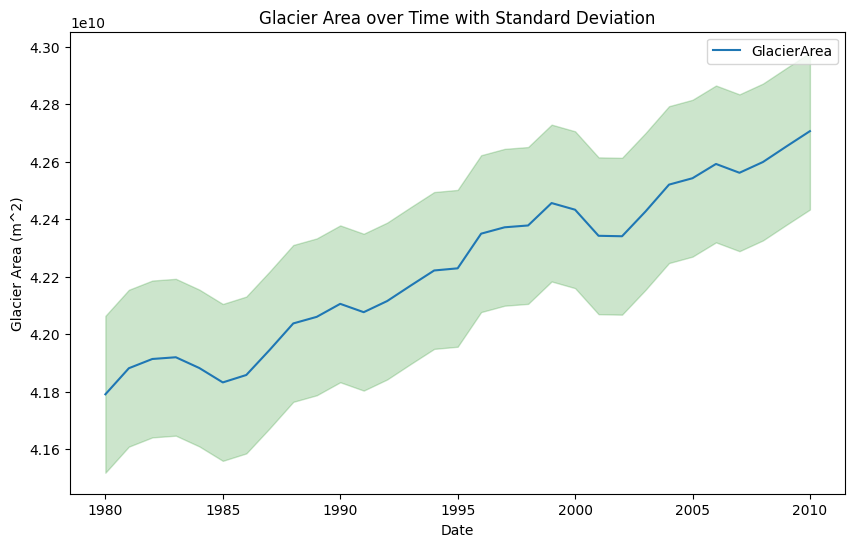

In [28]:
# prompt: show standard deviation in green color

import matplotlib.pyplot as plt
import numpy as np
# ... (your preceding code here)

# Calculate one standard deviation of glacier area
std_dev = np.std(data_annual['GlacierArea'])

# Plot glacier area over time with one standard deviation
data_annual.plot(y='GlacierArea', figsize=(10, 6))
plt.fill_between(data_annual.index, data_annual['GlacierArea'] - std_dev, data_annual['GlacierArea'] + std_dev, alpha=0.2, color='green')
plt.title('Glacier Area over Time with Standard Deviation')
plt.ylabel('Glacier Area (m^2)')
plt.xlabel('Date')
plt.show()


In [29]:
# prompt: data.head() add date column as index column

import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Read the CSV file
ssp2 = pd.read_csv('ssp2_gl_runoff.csv')

# Assume a density factor for converting precipitation to water equivalent (simplified as 1)
density_factor = 1

# Calculate daily mass balance
ssp2['MassBalance'] = density_factor * ssp2['Precipitation'] - ssp2['GlacierRunoff']

# Calculate cumulative mass balance over the period
ssp2['CumulativeMassBalance'] = ssp2['MassBalance'].cumsum()

# Set the date column as the index
ssp2 = ssp2.set_index('Date')

ssp2.head()


KeyboardInterrupt: 

In [30]:
# Initial conditions (synthetic values)
initial_volume = 4.32e8  # Initial glacier volume in cubic meters
initial_area = 4.27e9  # Initial glacier area in square meters
density_of_ice = 900  # Density of ice in kg/m^3 (from water equivalent to ice equivalent)

# Volume-area scaling parameters (example values, these should be determined empirically for real-world cases)
c = 0.035
gamma = 1.2735
#gamma = 0.923
# Calculate volume change from cumulative mass balance
# Convert cumulative mass balance to volume change (assuming glacier area remains constant initially)
volume_change = ssp2['CumulativeMassBalance'] * initial_area * 1e-3 / density_of_ice  # in cubic meters

# Calculate total volume at each time step
total_volume = initial_volume + volume_change

# Calculate glacier area using volume-area scaling
ssp2['GlacierArea'] = c * total_volume**gamma
#data.to_csv('hist_gl_area.csv', index=False)
ssp2.head()

,Temperature,Precipitation,GlacierRunoff,MassBalance,CumulativeMassBalance,GlacierArea
Date,,,,,,
2030-01-01,-24.537485,21.523235,0.0,21.523235,21.523235,3.479263e+09
2030-02-01,-24.011502,16.675009,0.0,16.675009,38.198243,3.480075e+09
2030-03-01,-21.826804,30.314503,0.0,30.314503,68.512746,3.481550e+09
2030-04-01,-16.756203,47.350606,0.0,47.350606,115.863352,3.483854e+09
2030-05-01,-12.152137,49.029923,0.0,49.029923,164.893275,3.486240e+09


In [31]:
# Extract the year from the index (assuming 'Date' is in YYYY-MM-DD format)
ssp2_annual = ssp2.groupby(ssp2.index.str[:4].astype(int)).sum()
#ssp2_annual.to_csv('ssp2_gl_area.csv', index=False)
ssp2_annual.head()

,Temperature,Precipitation,GlacierRunoff,MassBalance,CumulativeMassBalance,GlacierArea
Date,,,,,,
2030,-125.954883,318.012013,357.13,-39.117987,668.407776,4.177112e+10
2031,-122.456040,317.348774,358.40,-41.051226,174.168587,4.174708e+10
2032,-118.542978,303.808556,366.03,-62.221444,-457.555033,4.171635e+10
2033,-119.129385,301.540000,372.84,-71.300000,-1252.178148,4.167770e+10
2034,-120.847561,311.449184,359.52,-48.070816,-1980.020515,4.164231e+10


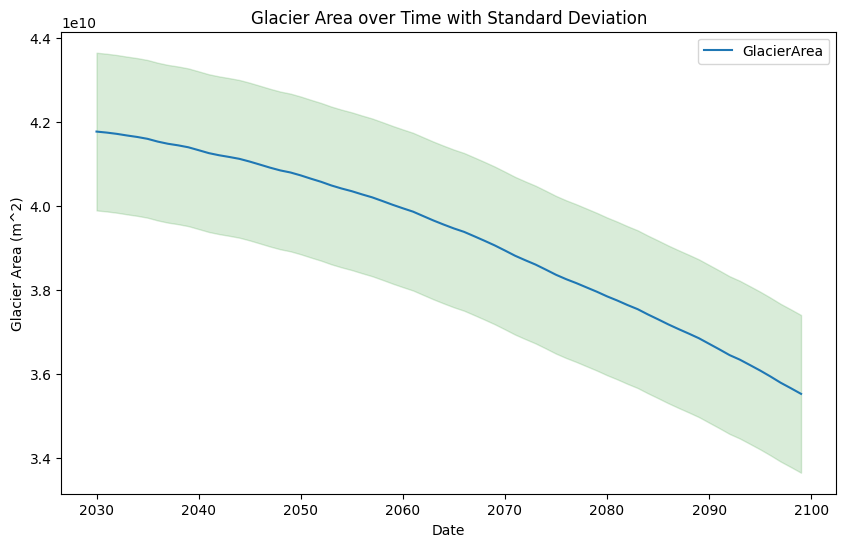

In [32]:
# prompt: show standard deviation in green color

import matplotlib.pyplot as plt
import numpy as np
# ... (your preceding code here)

# Calculate one standard deviation of glacier area
std_dev = np.std(ssp2_annual['GlacierArea'])

# Plot glacier area over time with one standard deviation
ssp2_annual.plot(y='GlacierArea', figsize=(10, 6))
plt.fill_between(ssp2_annual.index, ssp2_annual['GlacierArea'] - std_dev, ssp2_annual['GlacierArea'] + std_dev, alpha=0.15, color='green')
plt.title('Glacier Area over Time with Standard Deviation')
plt.ylabel('Glacier Area (m^2)')
plt.xlabel('Date')
plt.show()


In [33]:
# prompt: data.head() add date column as index column

import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Read the CSV file
ssp5 = pd.read_csv('ssp5_gl_runoff.csv')

# Assume a density factor for converting precipitation to water equivalent (simplified as 1)
density_factor = 1

# Calculate daily mass balance
ssp5['MassBalance'] = density_factor * ssp5['Precipitation'] - ssp5['GlacierRunoff']

# Calculate cumulative mass balance over the period
ssp5['CumulativeMassBalance'] = ssp5['MassBalance'].cumsum()

# Set the date column as the index
ssp5 = ssp5.set_index('Date')

ssp5.head()


KeyboardInterrupt: 

In [34]:
# Initial conditions (synthetic values)
initial_volume = 4.32e8  # Initial glacier volume in cubic meters
initial_area = 4.27e9  # Initial glacier area in square meters
density_of_ice = 900  # Density of ice in kg/m^3 (from water equivalent to ice equivalent)

# Volume-area scaling parameters (example values, these should be determined empirically for real-world cases)
c = 0.035
gamma = 1.2735
#gamma = 0.923
# Calculate volume change from cumulative mass balance
# Convert cumulative mass balance to volume change (assuming glacier area remains constant initially)
volume_change = ssp5['CumulativeMassBalance'] * initial_area * 1e-3 / density_of_ice  # in cubic meters

# Calculate total volume at each time step
total_volume = initial_volume + volume_change

# Calculate glacier area using volume-area scaling
ssp5['GlacierArea'] = c * total_volume**gamma
#data.to_csv('hist_gl_area.csv', index=False)
#volume_change.to_csv('ssp5_volume_CHANGE.csv', index=False)
#total_volume.head(50)

In [35]:
# Extract the year from the index (assuming 'Date' is in YYYY-MM-DD format)
ssp5_annual = ssp5.groupby(ssp5.index.str[:4].astype(int)).sum()
#ssp5_annual.to_csv('ssp5_gl_area.csv', index=False)
ssp5_annual.head()

,Temperature,Precipitation,GlacierRunoff,MassBalance,CumulativeMassBalance,GlacierArea
Date,,,,,,
2030,-106.949567,280.330164,446.11,-165.779836,-153.938992,4.173112e+10
2031,-105.218826,318.946036,431.66,-112.713964,-1720.755725,4.165492e+10
2032,-103.305580,298.915276,456.91,-157.994724,-3287.864962,4.157873e+10
2033,-103.279461,289.970932,440.83,-150.859068,-5238.813154,4.148392e+10
2034,-102.247059,299.828084,448.05,-148.221916,-6933.757254,4.140160e+10


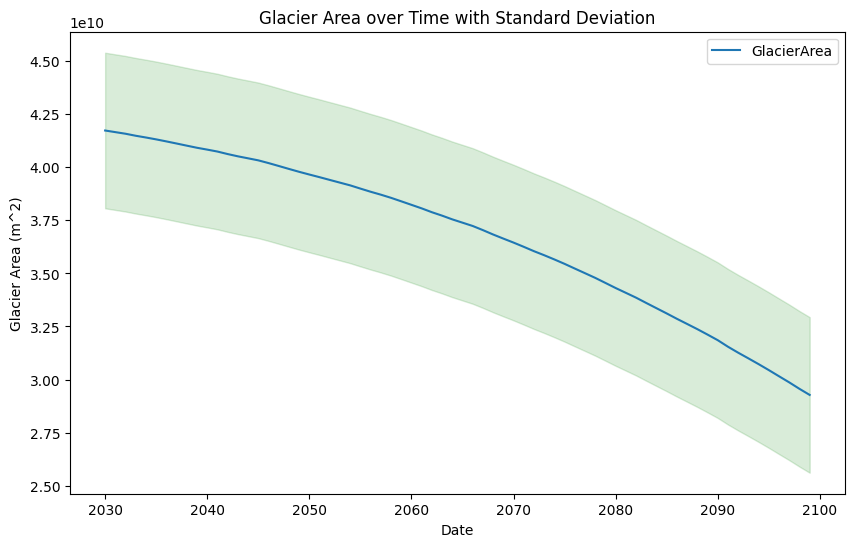

In [36]:
# prompt: show standard deviation in green color

import matplotlib.pyplot as plt
import numpy as np
# ... (your preceding code here)

# Calculate one standard deviation of glacier area
std_dev = np.std(ssp5_annual['GlacierArea'])

# Plot glacier area over time with one standard deviation
ssp5_annual.plot(y='GlacierArea', figsize=(10, 6))
plt.fill_between(ssp5_annual.index, ssp5_annual['GlacierArea'] - std_dev, ssp5_annual['GlacierArea'] + std_dev, alpha=0.15, color='green')
plt.title('Glacier Area over Time with Standard Deviation')
plt.ylabel('Glacier Area (m^2)')
plt.xlabel('Date')
plt.show()


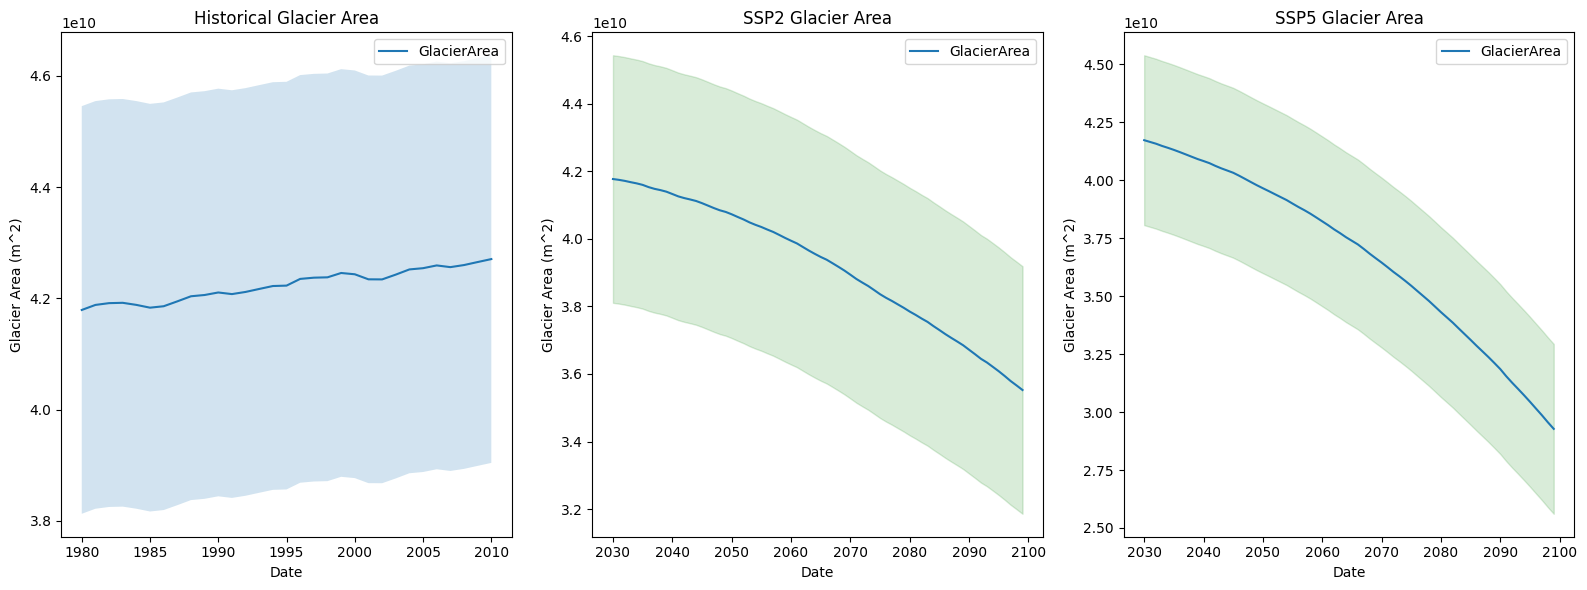

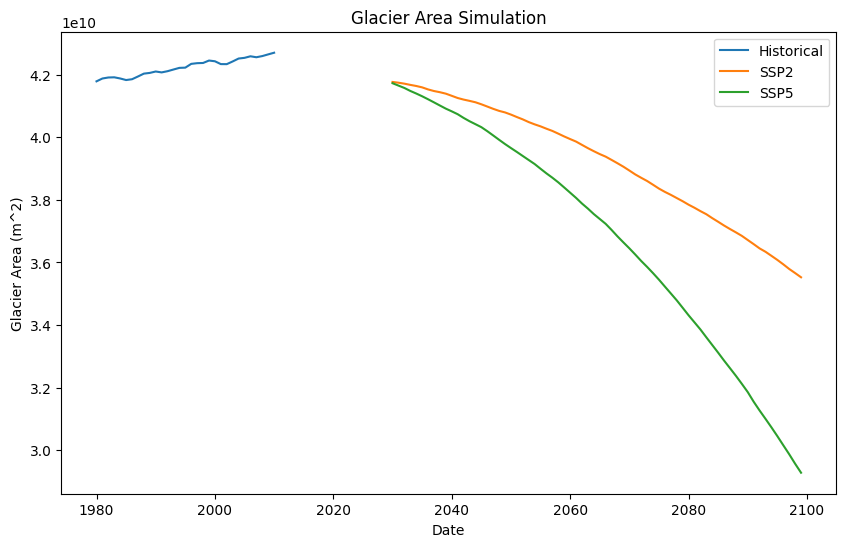

In [37]:
# prompt: combine Historical, ssp2 and ssp5 in one plot

import pandas as pd
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot data
data_annual.plot(y='GlacierArea', ax=axes[0], title='Historical Glacier Area')
axes[0].fill_between(data_annual.index, data_annual['GlacierArea'] - std_dev, data_annual['GlacierArea'] + std_dev, alpha=0.2)
axes[0].set_ylabel('Glacier Area (m^2)')
axes[0].set_xlabel('Date')

# Plot ssp2
ssp2_annual.plot(y='GlacierArea', ax=axes[1], title='SSP2 Glacier Area')
axes[1].fill_between(ssp2_annual.index, ssp2_annual['GlacierArea'] - std_dev, ssp2_annual['GlacierArea'] + std_dev, alpha=0.15, color='green')
axes[1].set_ylabel('Glacier Area (m^2)')
axes[1].set_xlabel('Date')

# Plot ssp5
ssp5_annual.plot(y='GlacierArea', ax=axes[2], title='SSP5 Glacier Area')
axes[2].fill_between(ssp5_annual.index, ssp5_annual['GlacierArea'] - std_dev, ssp5_annual['GlacierArea'] + std_dev, alpha=0.15, color='green')
axes[2].set_ylabel('Glacier Area (m^2)')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

# Combine data into a single DataFrame
combined_data = pd.concat([data_annual['GlacierArea'], ssp2_annual['GlacierArea'], ssp5_annual['GlacierArea']], axis=1)

# Plot combined data
combined_data.plot(figsize=(10, 6), title='Glacier Area Simulation')
plt.ylabel('Glacier Area (m^2)')
plt.xlabel('Date')
plt.legend(['Historical', 'SSP2', 'SSP5'])
plt.show()


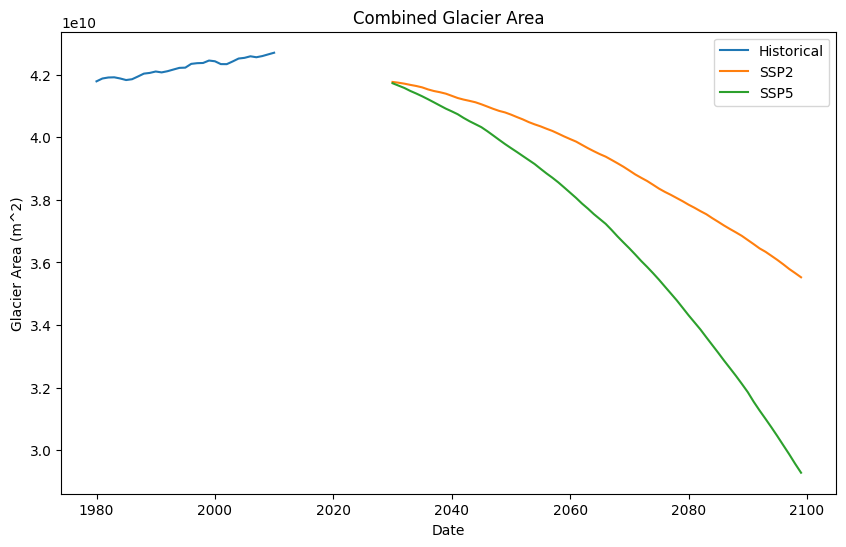

In [38]:


# Combine data into a single DataFrame
combined_data = pd.concat([data_annual['GlacierArea'], ssp2_annual['GlacierArea'], ssp5_annual['GlacierArea']], axis=1)

# Plot combined data
combined_data.plot(figsize=(10, 6), title='Combined Glacier Area')
plt.ylabel('Glacier Area (m^2)')
plt.xlabel('Date')
plt.legend(['Historical', 'SSP2', 'SSP5'])
plt.show()


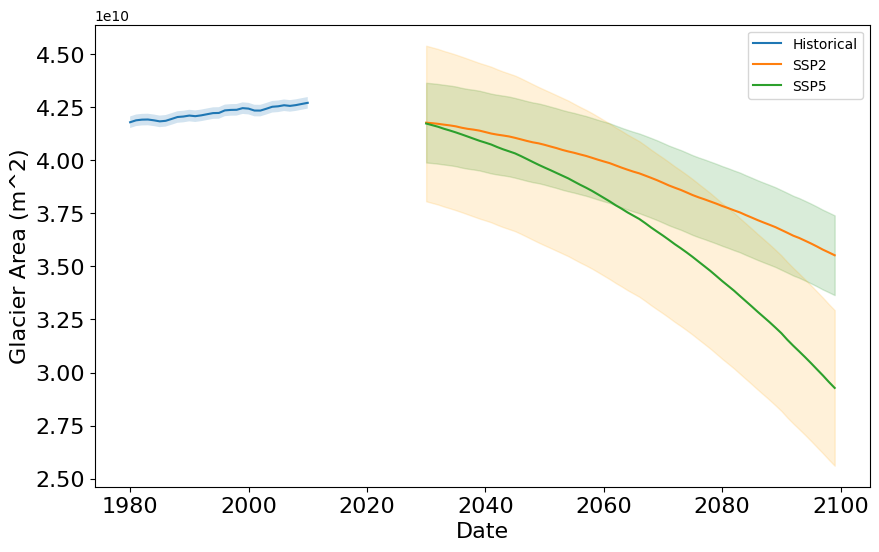

In [41]:
# prompt: increase font of x and y axis in above plot

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))

# Plot combined data
combined_data.plot(ax=ax, title='')
ax.set_ylabel('Glacier Area (m^2)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.legend(['Historical', 'SSP2', 'SSP5'])

# Calculate standard deviation for each scenario
std_dev_hist = np.std(data_annual['GlacierArea'])
std_dev_ssp2 = np.std(ssp2_annual['GlacierArea'])
std_dev_ssp5 = np.std(ssp5_annual['GlacierArea'])

# Fill standard deviation envelop for each scenario
ax.fill_between(data_annual.index, data_annual['GlacierArea'] - std_dev_hist, data_annual['GlacierArea'] + std_dev_hist, alpha=0.2)
ax.fill_between(ssp2_annual.index, ssp2_annual['GlacierArea'] - std_dev_ssp2, ssp2_annual['GlacierArea'] + std_dev_ssp2, alpha=0.15, color='green')
ax.fill_between(ssp5_annual.index, ssp5_annual['GlacierArea'] - std_dev_ssp5, ssp5_annual['GlacierArea'] + std_dev_ssp5, alpha=0.15, color='orange')

# Increase font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()
